In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Accuracy.csv')
df

,Model,Accuracy,Type
0,Random Forest,0.881250,Raw
1,Gaussian Naive Bayes,0.487500,Raw
2,KNN,0.812500,Raw
3,Random Forest,0.856250,Augmented
4,Gaussian Naive Bayes,0.628125,Augmented
5,KNN,0.840625,Augmented
6,Random Forest,0.878125,Feature Extracted
7,Gaussian Naive Bayes,0.534375,Feature Extracted
8,KNN,0.800000,Feature Extracted


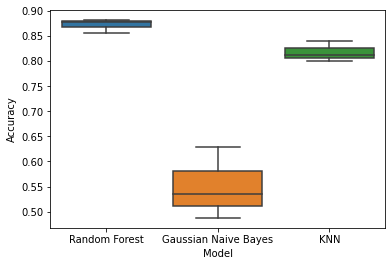

In [3]:
sns.boxplot(data=df, x='Model', y='Accuracy')
# plt.savefig('Evaluation Images/ml_boxplot.png')
plt.show()

In [4]:
df = pd.read_csv('CNN Models.csv')
df

,lr,weight decay,optimizer,loss function,accuracy,type
0,0.001,0.05,SGD,CrossEntropy,0.893750,raw
1,0.002,0.05,SGD,CrossEntropy,0.853125,raw
2,0.001,0.05,Adam,CrossEntropy,0.818750,raw
3,0.002,0.05,Adam,CrossEntropy,0.371875,raw
4,0.001,0.05,SGD,CrossEntropy,0.887500,augmented
5,0.002,0.05,SGD,CrossEntropy,0.896875,augmented
6,0.001,0.05,Adam,CrossEntropy,0.846875,augmented
7,0.002,0.05,Adam,CrossEntropy,0.837500,augmented


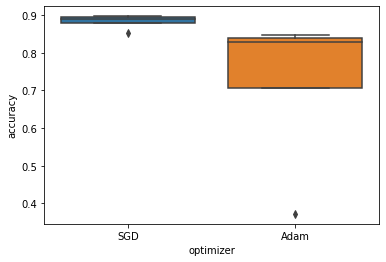

In [5]:
sns.boxplot(data=df, x='optimizer', y='accuracy')
# plt.savefig('Evaluation Images/dl_boxplot.png')
plt.show()

In [7]:
from random_forest_models import random_forest_test
from gaussian_nb_models import gaussian_nb_test
from knn_models import knn_test

In [8]:
import pickle

In [9]:
file = open("random_forest_raw", "rb")
model = pickle.load(file)

In [10]:
model.best_params_

{'bootstrap': False, 'n_estimators': 150}

In [11]:
df = pd.DataFrame(data={
    'Model': 'Random Forest',
    'Params': [model.best_params_],
    'Score': model.best_score_
})
df

,Model,Params,Score
0,Random Forest,"{'bootstrap': False, 'n_estimators': 150}",0.838281


In [12]:
file = open('gaussian_nb_raw', "rb")
model = pickle.load(file)

data = pd.DataFrame(data={
    'Model': 'Gaussian Naive Bayes',
    'Params': [model.best_params_],
    'Score': model.best_score_
})

df = df.append(data, ignore_index=True)
df

,Model,Params,Score
0,Random Forest,"{'bootstrap': False, 'n_estimators': 150}",0.838281
1,Gaussian Naive Bayes,{'var_smoothing': 1e-09},0.491406


In [13]:
file = open('knn_raw', "rb")
model = pickle.load(file)

data = pd.DataFrame(data={
    'Model': 'KNN',
    'Params': [model.best_params_],
    'Score': model.best_score_
})

df = df.append(data, ignore_index=True)
df

,Model,Params,Score
0,Random Forest,"{'bootstrap': False, 'n_estimators': 150}",0.838281
1,Gaussian Naive Bayes,{'var_smoothing': 1e-09},0.491406
2,KNN,{'n_neighbors': 5},0.796094


In [14]:
data = pd.DataFrame(data={
    'Model': 'CNN',
    'Params': [{'lr': 0.001, 'weight_decay': 0.05}],
    'Score': 89.3
})

df = df.append(data, ignore_index=True)
df

,Model,Params,Score
0,Random Forest,"{'bootstrap': False, 'n_estimators': 150}",0.838281
1,Gaussian Naive Bayes,{'var_smoothing': 1e-09},0.491406
2,KNN,{'n_neighbors': 5},0.796094
3,CNN,"{'lr': 0.001, 'weight_decay': 0.05}",89.300000


In [15]:
df = pd.read_csv('Model Reports/Random_Forest_Raw.csv')
df

,Unnamed: 0,1,2,3,4,5,6,accuracy,macro avg,weighted avg
0,precision,0.964286,0.976744,0.887097,0.807692,0.739130,1.000000,0.88125,0.895825,0.889659
1,recall,1.000000,0.893617,0.859375,0.792453,0.894737,0.844444,0.88125,0.880771,0.881250
2,f1-score,0.981818,0.933333,0.873016,0.800000,0.809524,0.915663,0.88125,0.885559,0.882830
3,support,54.000000,47.000000,64.000000,53.000000,57.000000,45.000000,0.88125,320.000000,320.000000


In [17]:
df = df.iloc[2]
df

Unnamed: 0      f1-score
1               0.981818
2               0.933333
3               0.873016
4                    0.8
5               0.809524
6               0.915663
accuracy         0.88125
macro avg       0.885559
weighted avg     0.88283
Name: 2, dtype: object

In [30]:
f1_rf_raw = df[1:].sum()/len(df[1:])

In [31]:
f1_rf_raw

0.8847769597711029

In [32]:
df = pd.read_csv('Model Reports/GaussianNB_Raw.csv')
df

,Unnamed: 0,1,2,3,4,5,6,accuracy,macro avg,weighted avg
0,precision,0.779661,0.320000,0.459459,0.583333,0.350649,0.493151,0.4875,0.497709,0.498883
1,recall,0.851852,0.340426,0.265625,0.264151,0.473684,0.800000,0.4875,0.499290,0.487500
2,f1-score,0.814159,0.329897,0.336634,0.363636,0.402985,0.610169,0.4875,0.476247,0.470984
3,support,54.000000,47.000000,64.000000,53.000000,57.000000,45.000000,0.4875,320.000000,320.000000


In [33]:
df = df.iloc[2]
df

Unnamed: 0      f1-score
1               0.814159
2               0.329897
3               0.336634
4               0.363636
5               0.402985
6               0.610169
accuracy          0.4875
macro avg       0.476247
weighted avg    0.470984
Name: 2, dtype: object

In [34]:
f1_gnb_raw = df[1:].sum()/len(df[1:])
f1_gnb_raw

0.476912376275997

In [35]:
df = pd.read_csv('Model Reports/KNN_Raw.csv')
df

df = df.iloc[2]
df

f1_knn_raw = df[1:].sum()/len(df[1:])
f1_knn_raw

0.8154636625041854

In [36]:
df = pd.read_csv('Model Reports/Random_Forest_Augmented.csv')
df

df = df.iloc[2]
df

f1_rf_augmented = df[1:].sum()/len(df[1:])
f1_rf_augmented

0.856973436222079

In [37]:
df = pd.read_csv('Model Reports/GaussianNB_Augmented.csv')
df

df = df.iloc[2]
df

f1_gnb_augmented = df[1:].sum()/len(df[1:])
f1_gnb_augmented

0.626987529160774

In [38]:
df = pd.read_csv('Model Reports/KNN_Augmented.csv')
df

df = df.iloc[2]
df

f1_knn_augmented = df[1:].sum()/len(df[1:])
f1_knn_augmented

0.8408650407942582

In [39]:
df = pd.read_csv('Model Reports/Random_Forest_Feature_ext.csv')
df

df = df.iloc[2]
df

f1_rf_feature_ext = df[1:].sum()/len(df[1:])
f1_rf_feature_ext

0.8816942287717053

In [40]:
df = pd.read_csv('Model Reports/GaussianNB_Feature_ext.csv')
df

df = df.iloc[2]
df

f1_gnb_feature_ext = df[1:].sum()/len(df[1:])
f1_gnb_feature_ext

0.5208646809606406

In [41]:
df = pd.read_csv('Model Reports/KNN_Feature_ext.csv')
df

df = df.iloc[2]
df

f1_knn_feature_ext = df[1:].sum()/len(df[1:])
f1_knn_feature_ext

0.803554453601541

In [44]:
df = pd.DataFrame(data={
    'Models': ['Random Forest', 'Gaussian NB', 'KNN', 'Random Forest', 'Gaussian NB', 'KNN', 'Random Forest', 'Gaussian NB', 'KNN'],
    'F1-Scores': [f1_rf_raw, f1_gnb_raw, f1_knn_raw, f1_rf_augmented, f1_gnb_augmented, f1_knn_augmented,
                  f1_rf_feature_ext, f1_gnb_feature_ext, f1_knn_feature_ext],
    'Type': ['Raw', 'Raw', 'Raw', 'Augmented', 'Augmented', 'Augmented', 'Feature Extracted', 'Feature Extracted',
                'Feature Extracted']
})

df

,Models,F1-Scores,Type
0,Random Forest,0.884777,Raw
1,Gaussian NB,0.476912,Raw
2,KNN,0.815464,Raw
3,Random Forest,0.856973,Augmented
4,Gaussian NB,0.626988,Augmented
5,KNN,0.840865,Augmented
6,Random Forest,0.881694,Feature Extracted
7,Gaussian NB,0.520865,Feature Extracted
8,KNN,0.803554,Feature Extracted


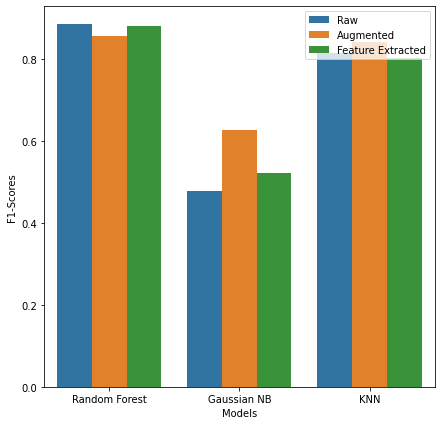

In [49]:
plt.figure(figsize=(7,7))
sns.barplot(data=df, x='Models', y='F1-Scores', hue='Type')
plt.legend(loc='upper right')
plt.show()

In [50]:
df = pd.read_csv('Accuracy.csv')
df = df.iloc[-3:]
df

,Model,Accuracy,Type
6,Random Forest,0.878125,Feature Extracted
7,Gaussian Naive Bayes,0.534375,Feature Extracted
8,KNN,0.800000,Feature Extracted


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

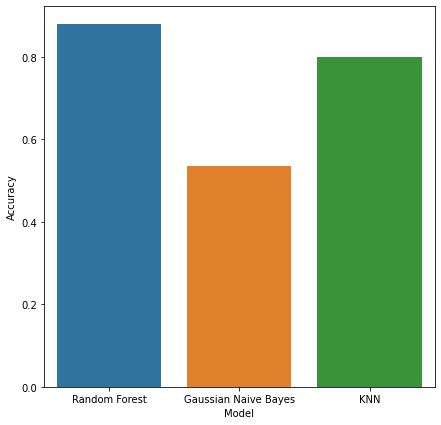

In [51]:
plt.figure(figsize=(7,7))
sns.barplot(data=df, x='Model', y='Accuracy')

In [2]:
df = pd.read_csv('Model Reports/Random_Forest_Raw.csv')
df

df = df.iloc[0]
df

rf_raw = df[1:].sum()/len(df[1:])

rf_raw

df = pd.read_csv('Model Reports/GaussianNB_Raw.csv')
df

df = df.iloc[0]
df

gnb_raw = df[1:].sum()/len(df[1:])
gnb_raw

df = pd.read_csv('Model Reports/KNN_Raw.csv')
df

df = df.iloc[0]
df

knn_raw = df[1:].sum()/len(df[1:])
knn_raw

df = pd.read_csv('Model Reports/Random_Forest_Augmented.csv')
df

df = df.iloc[0]
df

rf_augmented = df[1:].sum()/len(df[1:])
rf_augmented

df = pd.read_csv('Model Reports/GaussianNB_Augmented.csv')
df

df = df.iloc[0]
df

gnb_augmented = df[1:].sum()/len(df[1:])
gnb_augmented

df = pd.read_csv('Model Reports/KNN_Augmented.csv')
df

df = df.iloc[0]
df

knn_augmented = df[1:].sum()/len(df[1:])
knn_augmented

df = pd.read_csv('Model Reports/Random_Forest_Feature_ext.csv')
df

df = df.iloc[0]
df

rf_feature_ext = df[1:].sum()/len(df[1:])
rf_feature_ext

df = pd.read_csv('Model Reports/GaussianNB_Feature_ext.csv')
df

df = df.iloc[0]
df

gnb_feature_ext = df[1:].sum()/len(df[1:])
gnb_feature_ext

df = pd.read_csv('Model Reports/KNN_Feature_ext.csv')
df

df = df.iloc[0]
df

knn_feature_ext = df[1:].sum()/len(df[1:])
knn_feature_ext

df = pd.DataFrame(data={
    'Models': ['Random Forest', 'Gaussian NB', 'KNN', 'Random Forest', 'Gaussian NB', 'KNN', 'Random Forest', 'Gaussian NB', 'KNN'],
    'Precision': [rf_raw, gnb_raw, knn_raw, rf_augmented, gnb_augmented, knn_augmented,
                  rf_feature_ext, gnb_feature_ext, knn_feature_ext],
    'Type': ['Raw', 'Raw', 'Raw', 'Augmented', 'Augmented', 'Augmented', 'Feature Extracted', 'Feature Extracted',
                'Feature Extracted']
})

df

,Models,Precision,Type
0,Random Forest,0.893520,Raw
1,Gaussian NB,0.496705,Raw
2,KNN,0.824219,Raw
3,Random Forest,0.856667,Augmented
4,Gaussian NB,0.637953,Augmented
5,KNN,0.851836,Augmented
6,Random Forest,0.888772,Feature Extracted
7,Gaussian NB,0.549344,Feature Extracted
8,KNN,0.814177,Feature Extracted


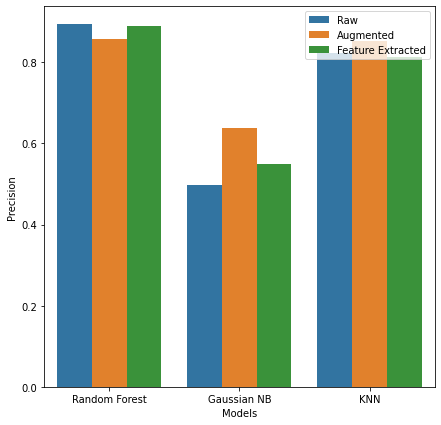

In [3]:
plt.figure(figsize=(7,7))
sns.barplot(data=df, x='Models', y='Precision', hue='Type')
plt.legend(loc='upper right')
plt.show()

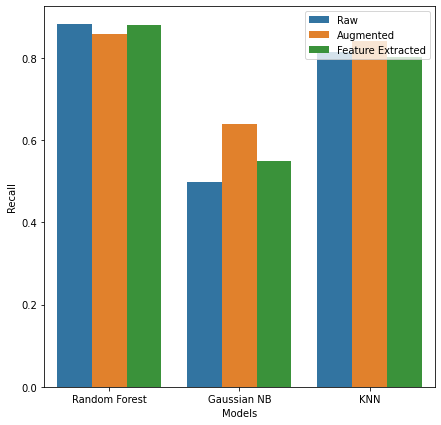

In [5]:
df = pd.read_csv('Model Reports/Random_Forest_Raw.csv')
df

df = df.iloc[1]
df

rf_raw = df[1:].sum()/len(df[1:])

rf_raw

df = pd.read_csv('Model Reports/GaussianNB_Raw.csv')
df

df = df.iloc[1]
df

gnb_raw = df[1:].sum()/len(df[1:])
gnb_raw

df = pd.read_csv('Model Reports/KNN_Raw.csv')
df

df = df.iloc[1]
df

knn_raw = df[1:].sum()/len(df[1:])
knn_raw

df = pd.read_csv('Model Reports/Random_Forest_Augmented.csv')
df

df = df.iloc[1]
df

rf_augmented = df[1:].sum()/len(df[1:])
rf_augmented

df = pd.read_csv('Model Reports/GaussianNB_Augmented.csv')
df

df = df.iloc[1]
df

gnb_augmented = df[1:].sum()/len(df[1:])
gnb_augmented

df = pd.read_csv('Model Reports/KNN_Augmented.csv')
df

df = df.iloc[1]
df

knn_augmented = df[1:].sum()/len(df[1:])
knn_augmented

df = pd.read_csv('Model Reports/Random_Forest_Feature_ext.csv')
df

df = df.iloc[1]
df

rf_feature_ext = df[1:].sum()/len(df[1:])
rf_feature_ext

df = pd.read_csv('Model Reports/GaussianNB_Feature_ext.csv')
df

df = df.iloc[1]
df

gnb_feature_ext = df[1:].sum()/len(df[1:])
gnb_feature_ext

df = pd.read_csv('Model Reports/KNN_Feature_ext.csv')
df

df = df.iloc[1]
df

knn_feature_ext = df[1:].sum()/len(df[1:])
knn_feature_ext

df = pd.DataFrame(data={
    'Models': ['Random Forest', 'Gaussian NB', 'KNN', 'Random Forest', 'Gaussian NB', 'KNN', 'Random Forest', 'Gaussian NB', 'KNN'],
    'Recall': [rf_raw, gnb_raw, knn_raw, rf_augmented, gnb_augmented, knn_augmented,
                  rf_feature_ext, gnb_feature_ext, knn_feature_ext],
    'Type': ['Raw', 'Raw', 'Raw', 'Augmented', 'Augmented', 'Augmented', 'Feature Extracted', 'Feature Extracted',
                'Feature Extracted']
})

df

plt.figure(figsize=(7,7))
sns.barplot(data=df, x='Models', y='Recall', hue='Type')
plt.legend(loc='upper right')
plt.show()